# DDM predictions of BOLD dynamics

DDM-based predictions of the visual cortex BOLD dynamics for Fig. S6.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Wedge

from dynamic_bias import utils
utils.setup_matplotlib()

In [2]:
utils.download_dataset("data/outputs/ddm")
ssbs = utils.load(f"{utils.ORIGIN}/data/outputs/ddm/results_stimulus_conditioned_pred.pickle")

downloading data/outputs/ddm...
data/outputs/ddm already exists. Skipping download...


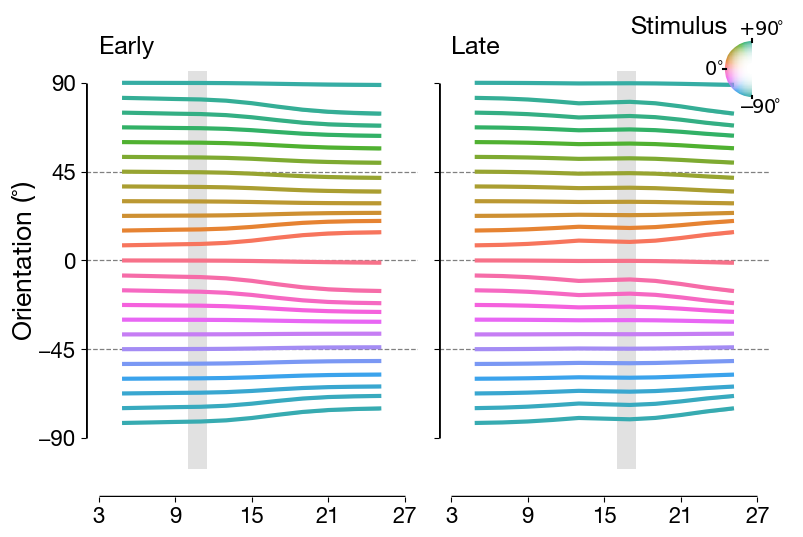

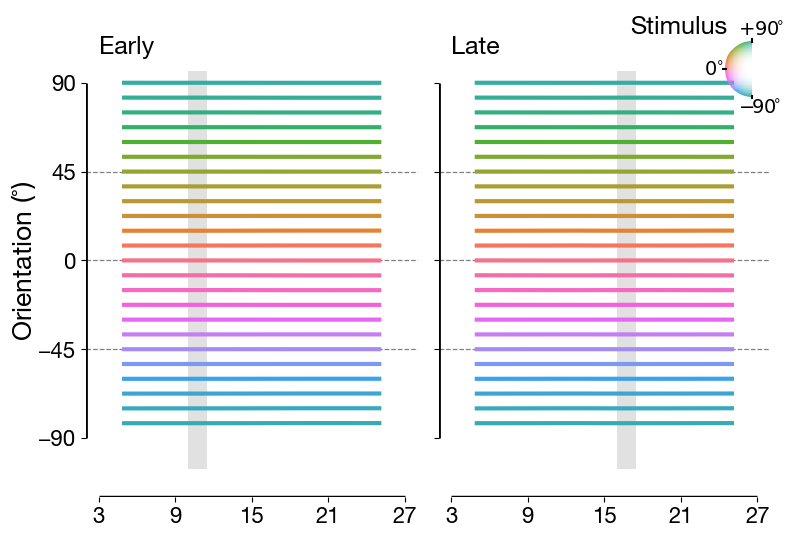

In [3]:
for i_model, n_model in enumerate( ['full', 'reduced'] ):

    ssb_err_e = utils.wrap( ssbs['ssb'][n_model]['early'] - utils.exp_stim_list()[:, None, None], period=180. )
    ssb_err_l = utils.wrap( ssbs['ssb'][n_model]['late']  - utils.exp_stim_list()[:, None, None], period=180. )

    earlym, earlys = utils.meanstats( ssb_err_e, axis=1 )
    latem, lates  = utils.meanstats( ssb_err_l, axis=1 )
    earlym = utils.wrap(earlym + utils.exp_stim_list()[:, None], period=180.) 
    latem = utils.wrap(latem  + utils.exp_stim_list()[:, None], period=180.)
    hdtv = np.arange(5,27,step=2) # timing of interest for visualizations

    f, ax = plt.subplots(1,2,sharey=True)
    utils.set_size([6,4.2])

    ax[0].axvspan(10,11.5,ymin=0.06,ymax=0.9,color='darkgrey',alpha=0.35,linewidth=0,zorder=-3)
    ax[1].axvspan(16,17.5,ymin=0.06,ymax=0.9,color='darkgrey',alpha=0.35,linewidth=0,zorder=-3)

    for i, (traj_m, traj_s) in enumerate( zip([earlym, latem], [earlys, lates]) ):
        for s in range(24):
            ax[i].fill_between(hdtv, traj_m[s]-traj_s[s], traj_m[s]+traj_s[s], 
                                color=utils.HUSL.colors[s], alpha=0.50, linewidth=0)
            ax[i].plot(hdtv, traj_m[s], color=utils.HUSL.colors[s], linewidth=3)
        ax[i].set_xlim([2,28])
        ax[i].set_ylim([-120,120])
        ax[i].axhline(y=0,   color='gray', linestyle='dashed', linewidth=0.9, zorder=0)
        ax[i].axhline(y=45,  color='gray', linestyle='dashed', linewidth=0.9, zorder=0)
        ax[i].axhline(y=-45, color='gray', linestyle='dashed', linewidth=0.9, zorder=0)
        utils.draw_publish_axis(ax[i], xrange=(3,27), yrange=(-90,90), 
                                xticks=[3,9,15,21,27], yticks=[-90,-45,0,45,90])

    # Create inset
    inset_ax = inset_axes(ax[1], width="25%", height="25%", bbox_to_anchor=(0.10, 0.05, 1, 1), bbox_transform=ax[1].transAxes)
                        
    x, y, r = 0, 0, 1
    re, im  = np.mgrid[-1:1:100j, -1:1:100j]
    dist    = np.clip(np.sqrt(re**2 + im**2)**3, 0, 1)
    angle   = np.angle(re + 1j*im)
    angle   = np.mod(2.*angle, 2. * np.pi) - np.pi  # Wrap the angle to have two cycles
    cmap    = LinearSegmentedColormap.from_list('', utils.HUSL.colors)
    img     = plt.pcolormesh(re, im, -angle, shading='auto', cmap=cmap, alpha=dist)

    wedge = Wedge(center=(x,y), r=r, theta1=90, theta2=270, width=0.8, clip_on=False, transform=inset_ax.transData)
    img.set_clip_path(wedge)
    inset_ax.use_sticky_edges = False
    inset_ax.margins(x=0.05, y=0.05)
    inset_ax.set_xlim([-1.5, 1.5])
    inset_ax.set_ylim([-2.1, 2.1])

    dd = 0.05
    for ang in [np.pi/2., -np.pi/2., np.pi]:
        inset_ax.plot([np.cos(ang)*(1.-dd), np.cos(ang)*(1.+dd)], 
                    [np.sin(ang)*(1.-dd), np.sin(ang)*(1.+dd)], color='k', zorder=3)

    ax[1].text(17,115, 'Stimulus', size=18)
    inset_ax.text(np.cos(np.pi/2.)-0.50,  np.sin(np.pi/2.)+0.15, r'$+90\!\!^\circ$', size=14)
    inset_ax.text(np.cos(np.pi)-0.70, np.sin(np.pi)-0.25, r'$\!\!0\!^\circ$', size=14)
    inset_ax.text(np.cos(-np.pi/2.)-0.50, np.sin(-np.pi/2.)-0.6, r'$-\!90\!\!^\circ$', size=14)
    inset_ax.axis('off')

    if utils.LABEL:
        ax[0].set_ylabel(r"Orientation $(\!\!^\circ\!\!)$", labelpad=0)    
        ax[0].text(3,105,'Early',fontsize=18)
        ax[1].text(3,105,'Late',fontsize=18)
        
    fign = ['a', 'c'][i_model]
    plt.savefig(f'{utils.DIR_FIGURE}/figs6{fign}.pdf',bbox_inches='tight', transparent=True)
    plt.show()

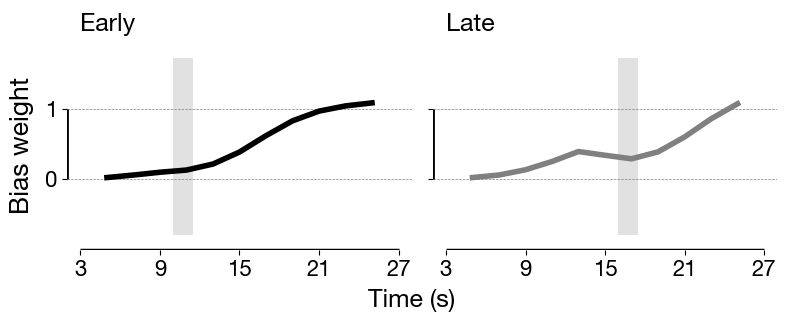

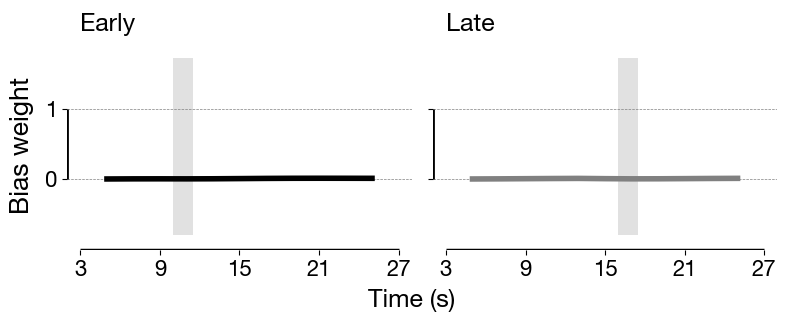

In [4]:
for i_model, n_model in enumerate( ['full', 'reduced'] ):
    earlym, earlys = utils.meanstats( ssbs['ssb_weights'][n_model]['early'], axis=0 )
    latem,  lates  = utils.meanstats( ssbs['ssb_weights'][n_model]['late'],  axis=0 )

    f, ax = plt.subplots(1,2, sharey=True)
    utils.set_size([6,2.4])

    ax[0].axvspan(10,11.5,ymin=0.06,ymax=0.8,color='darkgrey',alpha=0.35,linewidth=0,zorder=-3)
    ax[1].axvspan(16,17.5,ymin=0.06,ymax=0.8,color='darkgrey',alpha=0.35,linewidth=0,zorder=-3)

    for i, (traj_m, traj_s) in enumerate( zip([earlym, latem], [earlys, lates]) ):
        color = ['k', 'gray'][i]
        ax[i].axhline(y=0, color='gray', linestyle='dashed', linewidth=0.5)
        ax[i].axhline(y=1, color='gray', linestyle='dashed', linewidth=0.5)
        ax[i].plot(hdtv, traj_m, linewidth=4, color=color)
        ax[i].fill_between(hdtv, traj_m-traj_s, traj_m+traj_s, alpha=0.3, linewidth=0, color=color)
        ax[i].set_ylim([-1,2.4])
        ax[i].set_xlim([ 2, 28])
        utils.draw_publish_axis(ax[i], xrange=(3,27), yrange=(0,1), xticks=[3,9,15,21,27], yticks=[0,1])

    if utils.LABEL:
        ax[0].text(3,2.1,'Early',fontsize=18)
        ax[1].text(3,2.1,'Late',fontsize=18)
        f.text(0.5, 0.0, r"Time (s)", ha='center', va='center', fontsize=18)
        ax[0].set_ylabel(r"Bias weight", labelpad=8, horizontalalignment='right', position=(1,0.72))

    fign = ['b', 'd'][i_model]
    plt.savefig(f'{utils.DIR_FIGURE}/figs6{fign}.pdf',bbox_inches='tight', transparent=True)
    plt.show()